# Handwritten Number Classification

In [47]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

## Build Neural Network

In [58]:
class Neural_Network(nn.Module):
    
    # Constructor
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.linear1 = nn.Linear(28*28, 56)
        self.linear2 = nn.Linear(56, 28)
        self.linear3 = nn.Linear(28, 10)
    
    # Prediction
    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.tanh(x)
        x = self.linear3(x)
        x = torch.tanh(x)
        return x

In [59]:
model = Neural_Network()

In [60]:
print(model.forward)

<bound method Neural_Network.forward of Neural_Network(
  (linear1): Linear(in_features=784, out_features=56, bias=True)
  (linear2): Linear(in_features=56, out_features=28, bias=True)
  (linear3): Linear(in_features=28, out_features=10, bias=True)
)>


## Load Data (from Pytorch)

In [61]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [62]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Build Train Structure

In [63]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=10):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

## Train

In [64]:
results = train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100)

## Visualization

Text(0, 0.5, 'accuracy')

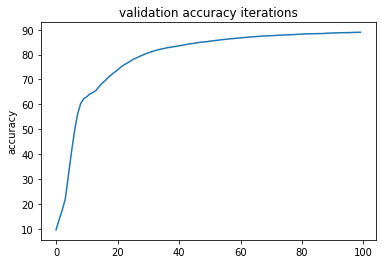

In [79]:
plt.plot(results['validation_accuracy'])

plt.title('validation accuracy iterations')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

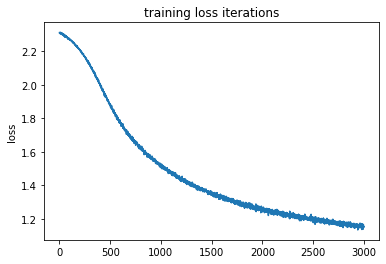

In [80]:
plt.plot(results['training_loss'])
plt.title('training loss iterations')
plt.ylabel('loss')